# Machine Learning Project on Employee Attrition Prediction with Python

This is a machine learning project on employee attrition prediction with Python programming language.

1] Importing the necessary Python libraries that we need for this task:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

2] Importing the data

In [196]:
df=pd.read_csv('employee.csv')

previewing the data

In [197]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In our dataset some of the columns including Attrition column contains categorical variables therefore requires numeric coding.

In [198]:
df.groupby('BusinessTravel').size()

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64

In [199]:
df['BusinessTravel'].replace( 'Non-Travel', 0, inplace=True )
df['BusinessTravel'].replace( 'Travel_Frequently', 1, inplace=True )
df['BusinessTravel'].replace( 'Travel_Rarely', 2, inplace=True )

In [201]:
df.groupby('Department').size()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

In [202]:
df['Department'].replace( 'Human Resources', 0, inplace=True )
df['Department'].replace( 'Research & Development', 1, inplace=True )
df['Department'].replace( 'Sales', 2, inplace=True )

In [203]:
df.groupby('EducationField').size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [204]:
df['EducationField'].replace( 'Human Resources', 0, inplace=True )
df['EducationField'].replace( 'Life Sciences', 1, inplace=True )
df['EducationField'].replace( 'Marketing', 2, inplace=True )
df['EducationField'].replace( 'Medical', 3, inplace=True )
df['EducationField'].replace( 'Other', 4, inplace=True )
df['EducationField'].replace( 'Technical Degree', 5, inplace=True )

In [205]:
df.groupby('Attrition').size()

Attrition
No     1233
Yes     237
dtype: int64

In [206]:
df['Attrition'].replace( 'No', 0, inplace=True )
df['Attrition'].replace( 'Yes', 1, inplace=True )


In [207]:
df.groupby("Gender").size()

Gender
Female    588
Male      882
dtype: int64

In [208]:
df['Gender'].replace( 'Female', 0, inplace=True )
df['Gender'].replace( 'Male', 1, inplace=True )


In [209]:
df.groupby("JobRole").size()

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [210]:
df['JobRole'].replace( 'Healthcare Representative', 0, inplace=True )
df['JobRole'].replace( 'Human Resources', 1, inplace=True )
df['JobRole'].replace( 'Laboratory Technician', 2, inplace=True )
df['JobRole'].replace( 'Manager', 3, inplace=True )
df['JobRole'].replace( 'Manufacturing Director', 4, inplace=True )
df['JobRole'].replace( 'Research Director', 5, inplace=True )
df['JobRole'].replace( 'Research Scientist', 6, inplace=True )
df['JobRole'].replace( 'Sales Executive', 7, inplace=True )
df['JobRole'].replace( 'Sales Representative', 8, inplace=True )


In [211]:
df.groupby('MaritalStatus').size()

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

In [212]:
df['MaritalStatus'].replace( 'Divorced', 0, inplace=True )
df['MaritalStatus'].replace( 'Married', 1, inplace=True )
df['MaritalStatus'].replace( 'Single', 2, inplace=True )

In [213]:
df.groupby("Over18").size()

Over18
Y    1470
dtype: int64

In [214]:
df['Over18'].replace('Y', 1, inplace=True )

In [215]:
df.groupby("OverTime").size()

OverTime
No     1054
Yes     416
dtype: int64

In [216]:
df['OverTime'].replace('No',0,inplace=True)
df['OverTime'].replace('Yes',1,inplace=True)

In [217]:
df.OverTime.head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int64

In [218]:
df.groupby("NumCompaniesWorked").size()

NumCompaniesWorked
0    197
1    521
2    146
3    159
4    139
5     63
6     70
7     74
8     49
9     52
dtype: int64

Checking for any categorical data through the data

In [219]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Basic information regarding dataset

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [221]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


number of rows and columns in dataset

In [222]:
print("Dimension of dataset :",df.shape)

Dimension of dataset : (1470, 35)


checking for any null values in dataset

In [223]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

3]Exploratary data analysis

Plotting kde plots in seaborn to explore various features about dataset

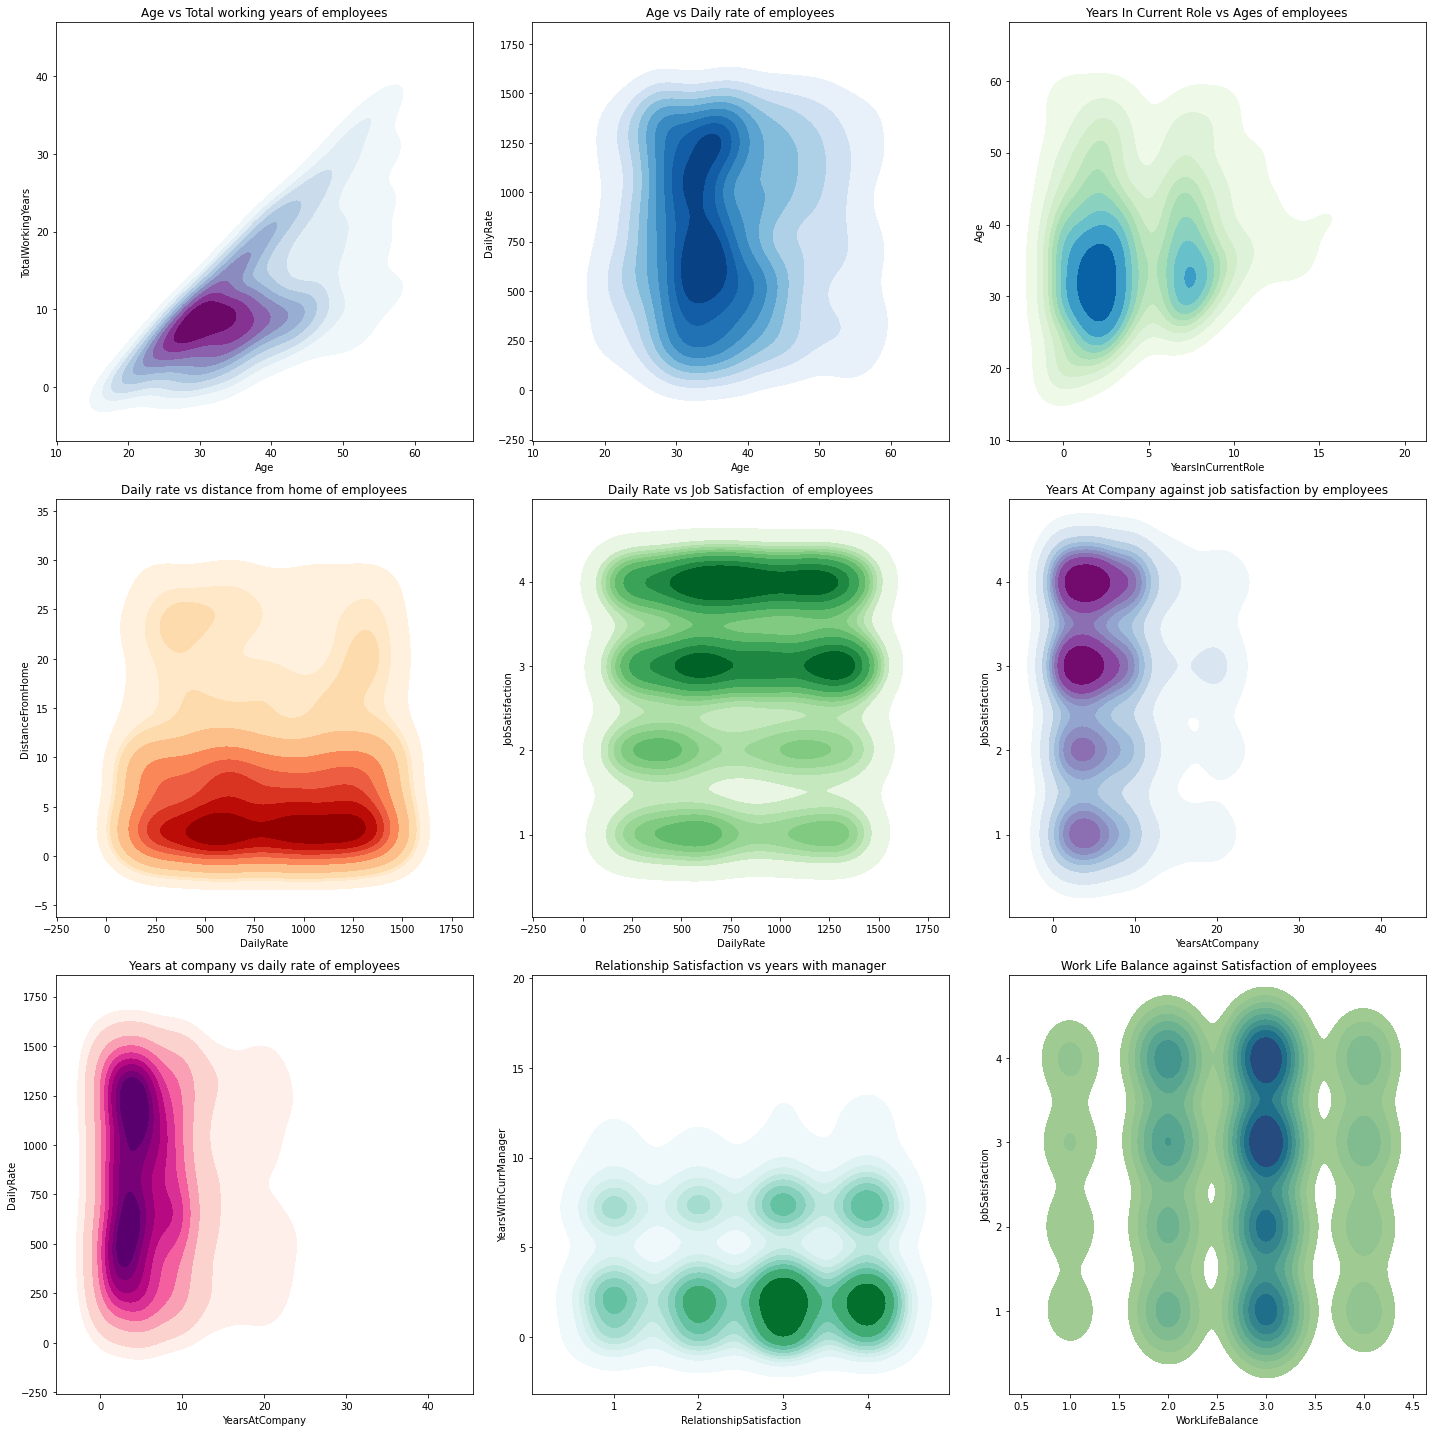

In [224]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), 
                       sharex=False, sharey=False)



sns.kdeplot(x='Age',y='TotalWorkingYears',shade=True,cmap='BuPu',data=df,ax=axes[0,0])
axes[0,0].set_title('Age vs Total working years of employees')



sns.kdeplot(x='Age',y='DailyRate',shade=True,data=df,cmap='Blues',ax=axes[0,1])
axes[0,1].set_title('Age vs Daily rate of employees')


sns.kdeplot(x='YearsInCurrentRole',y='Age',cmap='GnBu',shade=True,data=df,ax=axes[0,2])
axes[0,2].set_title('Years In Current Role vs Ages of employees')


sns.kdeplot(x='DailyRate',y='DistanceFromHome',shade=True,cmap='OrRd',data=df,ax=axes[1,0])
axes[1,0].set_title('Daily rate vs distance from home of employees')


sns.kdeplot(x='DailyRate',y='JobSatisfaction',shade=True,cmap='Greens',data=df,ax=axes[1,1])
axes[1,1].set_title('Daily Rate vs Job Satisfaction  of employees')


sns.kdeplot(x='YearsAtCompany',y='JobSatisfaction',shade=True,cmap='BuPu',data=df,ax=axes[1,2])
axes[1,2].set_title('Years At Company against job satisfaction by employees')


sns.kdeplot(x='YearsAtCompany',y='DailyRate',shade=True,cmap='RdPu',data=df,ax=axes[2,0])
axes[2,0].set_title('Years at company vs daily rate of employees')


sns.kdeplot(x='RelationshipSatisfaction',y='YearsWithCurrManager',shade=True,cmap='BuGn',data=df,ax=axes[2,1])
axes[2,1].set_title('Relationship Satisfaction vs years with manager')


sns.kdeplot(x='WorkLifeBalance',y='JobSatisfaction',shade=True,cmap='crest',data=df,ax=axes[2,2])
axes[2,2].set_title(' Work Life Balance against Satisfaction of employees')


fig.tight_layout()

In [ ]:
Plotting heatmat to find out correlation of feature with each other

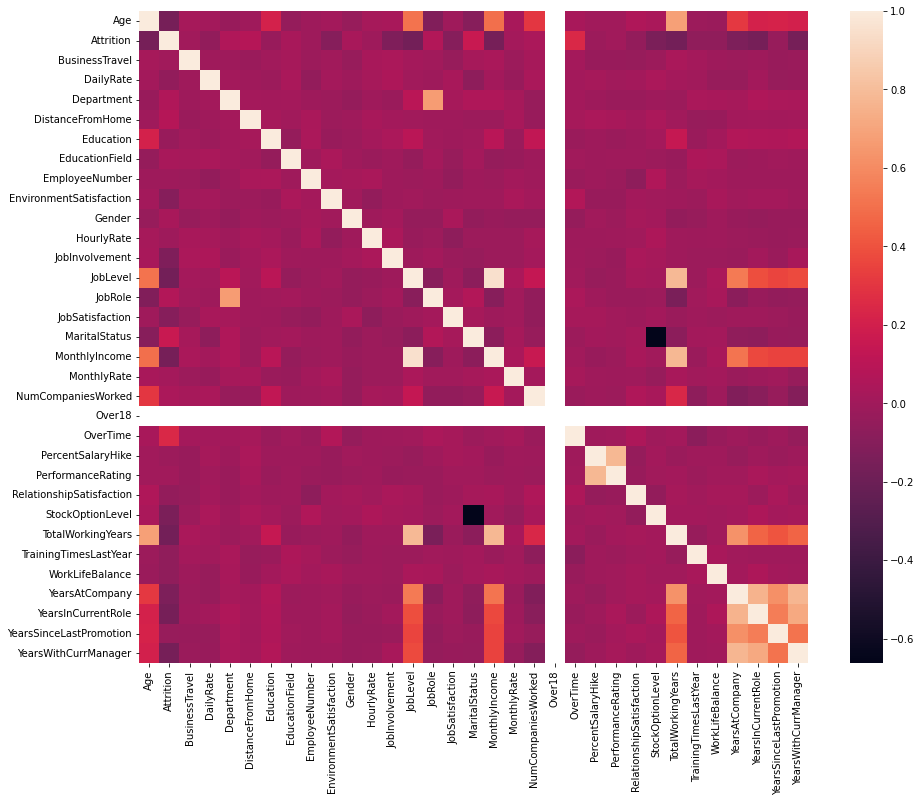

In [225]:
df1=df.drop(columns=['EmployeeCount','StandardHours'],axis=1)
df1.head()

plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(),data=df1)
plt.show()

From the correlation plot, we can see that a lot of our columns appear to be poorly correlated to each other. Generally, when building a predictive model, it would be better to train a model with features that are not too correlated with each other so that we don’t need to deal with redundant features. 

4] Applying models to check accuracy of test data

In [226]:
x=df.drop(columns='Attrition',axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [227]:
y=df.Attrition
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

a) K-N Neighbors classification

In [229]:
train_accuracy=[]
test_accuracy=[]

n_neighbors_range = range(1,11)
for n_neighbors in n_neighbors_range:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

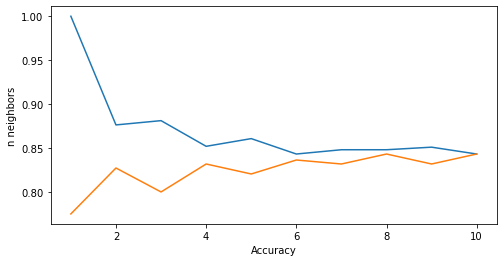

In [230]:
plt.figure(figsize=(8,4))

plt.plot(n_neighbors_range,train_accuracy,label="Training Accuracy")
plt.plot(n_neighbors_range,test_accuracy,label="Testing Accuracy")

plt.ylabel('n neighbors')
plt.xlabel('Accuracy')

plt.show


In [231]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [232]:
print("Accuracy of training data : {:0.3f} ".format(knn.score(x_train,y_train)))
print("Accuracy of testing data : {:0.3f} ".format(knn.score(x_test,y_test)))

Accuracy of training data : 0.851 
Accuracy of testing data : 0.832 


b)Decision tree classification

In [233]:
tree=DecisionTreeClassifier(max_depth=4,random_state=67)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=67)

In [234]:
print("Accuracy of training data : {:0.3f}".format(tree.score(x_train,y_train)))
print("Accuracy of testing data : {:0.3f} ".format(tree.score(x_test,y_test)))

Accuracy of training data : 0.886
Accuracy of testing data : 0.841 


c)Random forest classification

In [241]:
rnf=RandomForestClassifier(max_depth=4,max_features='sqrt',n_estimators=100,random_state=134)
rnf.fit(x_train,y_train)

y_pred=rnf.predict(x_test)

print("Accuracy of Training data : {:0.3f}".format(rnf.score(x_train,y_train)))
print('Accuracy of Testing data : {:0.3f}'.format(rnf.score(x_test,y_test)))

Accuracy of Training data : 0.871
Accuracy of Testing data : 0.850


In [246]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("="*80)
print(classification_report(y_test,y_pred))

Accuracy score: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.83      0.07      0.13        70

    accuracy                           0.85       441
   macro avg       0.84      0.53      0.52       441
weighted avg       0.85      0.85      0.79       441



As observed, our Random Forest returns around 85% accuracy for its predictions and at first glance, this may seem like a fairly good model.

5]Feature importance

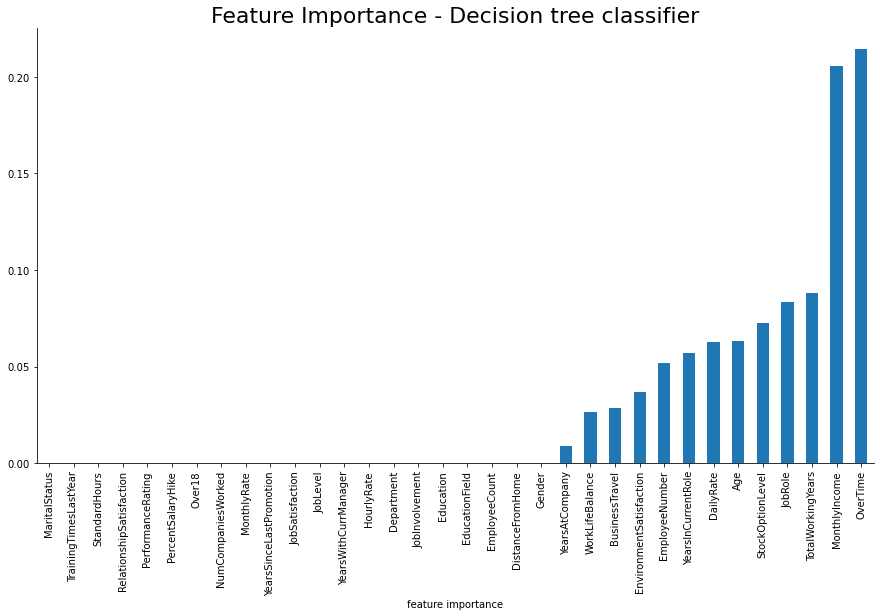

In [243]:
feat_import= pd.Series(tree.feature_importances_, index = x_train.columns)
ax = feat_import.sort_values(ascending = True).plot(kind = 'bar', figsize = (15,8))
plt.title('Feature Importance - Decision tree classifier', fontsize = 22)
sns.despine()
plt.xlabel('feature importance')
plt.show()

Hence from above plot ,it can be conclude that overtime, monthly income are two most important features for determining attrition of employees.